#  Predicting the age of abalone from physical measurements
## The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

Data comes from an original (non-machine-learning) study: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

Title: UCI Abalone Database. Predict number of rings (age) of abalone from physical measurements
Origin: natural

Usage: assessment

Order: uninformative

In [4]:
import pandas as pd 

# Using read_csv to read in .data data
data = pd.read_csv("/Users/mickey.rice/Downloads/abalone/Dataset.data", delimiter=' ', header=None)

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Add names of the columns

data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# One-hot encode the 'sex' column
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


In [7]:
# Define Features (X) and Target (y)

# Features are all columns except 'rings'
X = data.drop(columns=['rings'])

# Target variable is 'rings'
y = data['rings']

In [8]:
# Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Build the Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model (using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.107539234449761


Interpretation: An MSE of 5.108 means that, on average, the squared difference between the predicted number of rings and the actual number is around 5.1 rings. Taking the square root of MSE gives Root Mean Squared Error (RMSE): ≈2.26
This means, on average, the model's predictions are off by about 2.26 rings in terms of raw units (number of rings).

In [11]:
# Model Evaluation

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.5281810502563149


Interpretation: 52.8% of the variance in the number of rings is explained by the model. This indicates a moderate fit - the model is capturing a reasonable portion of the relationship, but there’s still 47.2% of the variance unexplained, which suggests there’s room for improvement in the model or that some variables are missing or not well-captured.

In [12]:
# Estimating Age from Rings

# Age of abalone=Rings+1.5

age_pred = y_pred + 1.5
print(age_pred[:10])  # Display first 10 predicted ages


[13.83 11.02 15.81 12.39 14.15 12.   10.25 10.33  8.17 11.68]


Let's try a new model to see if it fits better!

MLPRegressor for building the neural network and StandardScaler for feature scaling

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
# Initialize the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the neural network
mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42)

In [15]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

# Convert MSE to RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.5790726699853661
Mean Squared Error: 4.5566267613241385
Root Mean Squared Error: 2.13462567241288


Interpretation: 57.9% of the variance in the number of rings is explained by the model. This is better than the Random Forest Regressor model, but there’s still 42.1% of the variance unexplained, which suggests there’s room for improvement in the model or that some variables are missing or not well-captured.

An MSE of 4.557 means that, on average, the squared difference between the predicted number of rings and the actual number is around 4.6 rings. Taking the square root of MSE gives Root Mean Squared Error (RMSE): ≈2.13
This means, on average, the model's predictions are off by about 2.13 rings in terms of raw units (number of rings).

Overall this is a better model than the Random Forestor Regression model, but still not ideal. 

In [16]:
age_pred = y_pred + 1.5
print(age_pred[:10])  # Display first 10 predicted ages

[12.92326569 10.67261431 16.64217162 12.44020236 13.40612487 12.18287739
 10.47947644  9.86644265  8.22224231 11.61016916]


Let's fine tune the model!

Random Search:
Instead of testing all possible combinations (i.e., Grid Search), Random Search randomly samples a subset of hyperparameter combinations, allowing for faster tuning with larger parameter spaces.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# define the param grid
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, scoring='r2')

random_search.fit(X_train_scaled, y_train)

# Best parameters
print(f'Best parameters: {random_search.best_params_}')
print(f'Best R-squared score: {random_search.best_score_}')

Best parameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50, 25), 'alpha': 0.0001, 'activation': 'tanh'}
Best R-squared score: 0.5847426049153279


In [19]:
# Evaluate on the test set
y_test_pred = random_search.best_estimator_.predict(X_test_scaled)

# Calculate the test set performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {test_r2}')

Test MSE: 4.4278584204209475
Test R-squared: 0.5909678979173206


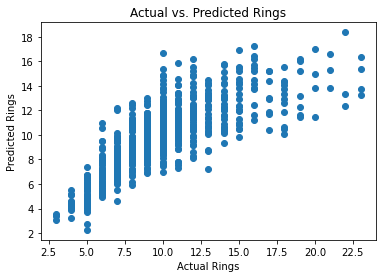

In [21]:
# Visualize predictions

import matplotlib.pyplot as plt

# Plot actual vs. predicted rings
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs. Predicted Rings')
plt.show()

The fine tuned neural network predicts abalone age more precisely (58 - 59%) than before, but there is still unaccounted for variability, further demonstrated in the plot.

In summary:

1) Random Forest Regression: builds multiple decision trees and averages their predictions. It’s particularly good at capturing non-linear relationships and reducing overfitting

2) Neural Networks (MLPRegressor): powerful for capturing complex, non-linear relationships. 
    a) After tuning (via Grid Search, evaluate performance improvements by comparing R-squared and MSE before and after
      tuning.
   b) Neural networks can capture more complex patterns, but they are harder to interpret than Random Forests.
   c) Test the model on a holdout set to ensure it generalizes well.
 
3) Select the best-performing model: Choose between Random Forest and Neural Network based on which model gives better results (higher R-squared, lower MSE).